In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
# from torch_two_sample.statistics_diff import MMDStatistic
import torch

import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from IPython import display
from tqdm import tqdm
from shutil import copyfile


## **Data preprocessing**

In [ ]:
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


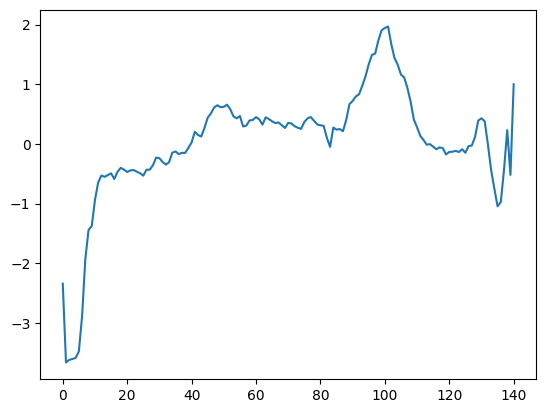

In [ ]:
plt.plot(df.iloc[45])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [ ]:
(df.count()!= 4998).unique()

array([False])

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


In [ ]:
by_label  = df.groupby(140).count()
by_label.unstack(0)[0]

140
0.0    2079
1.0    2919
dtype: int64

In [ ]:
data = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
# print(labels.shape)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 123)
print('train data shape: ', train_data.shape)
print('test data shape: ', test_data.shape)
print('train labels shape: ', train_labels.shape)
print('test labels shape: ', test_labels.shape)

train data shape:  (3998, 140)
test data shape:  (1000, 140)
train labels shape:  (3998,)
test labels shape:  (1000,)


In [ ]:
#Now lets Normalize the data -1 1
# Calculate the minimum and maximum values from the training set
data_min = tf.reduce_min(train_data)
data_max = tf.reduce_max(train_data)

# Normalize the training data to the range [-1, 1]
train_data = (train_data - data_min) / (data_max - data_min) * 2 - 1

# Normalize the test data using the same minimum and maximum values
test_data = (test_data - data_min) / (data_max - data_min) * 2 - 1

# Cast the normalized data to the tf.float32 data type
train_data_float = tf.cast(train_data, dtype=tf.float32)
test_data_float = tf.cast(test_data, dtype=tf.float32)


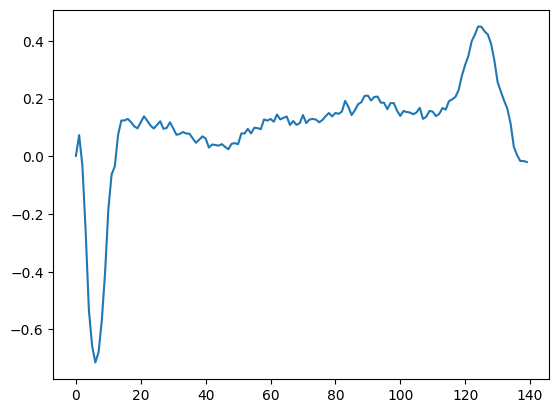

In [ ]:
normal_ecg = train_data[5]
plt.plot(normal_ecg)

In [ ]:
#The labels are either 0 or 1, so I will convert them into boolean
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#Now let's separate the data for normal ECG from that of abnormal ones
#Normal ECG data
normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]


#transforming to tensorflow.float type
normal_train_data_float = tf.cast(normal_train_data, dtype=tf.float32)
normal_test_data_float = tf.cast(normal_test_data, dtype=tf.float32)

#transforming to pd.dataframe:
normal_train_data_df = pd.DataFrame(normal_train_data, columns = df.columns[0:140])
normal_test_data_df = pd.DataFrame(normal_test_data, columns = df.columns[0:140])

#shapes
print('normal train data df shape: ', normal_train_data_df.shape)
print('normal test data df shape: ', normal_test_data_df.shape)

#Abnormal ECG data

abnormal_train_data = train_data[~train_labels]
abnormal_test_data = test_data[~test_labels]

#transforming to tensorflow.float type
abnormal_train_data_float = tf.cast(abnormal_train_data, dtype=tf.float32)
abnormal_test_data_float = tf.cast(abnormal_test_data, dtype=tf.float32)

#transforming to pd.dataframe:
abnormal_train_data_df = pd.DataFrame(abnormal_train_data, columns = df.columns[0:140])
abnormal_test_data_df = pd.DataFrame(abnormal_test_data, columns = df.columns[0:140])

#shapes
print('abnormal train data df shape: ', abnormal_train_data_df.shape)
print('abnormal test data df shape: ', abnormal_test_data_df.shape)




normal train data df shape:  (2323, 140)
normal test data df shape:  (596, 140)
abnormal train data df shape:  (1675, 140)
abnormal test data df shape:  (404, 140)


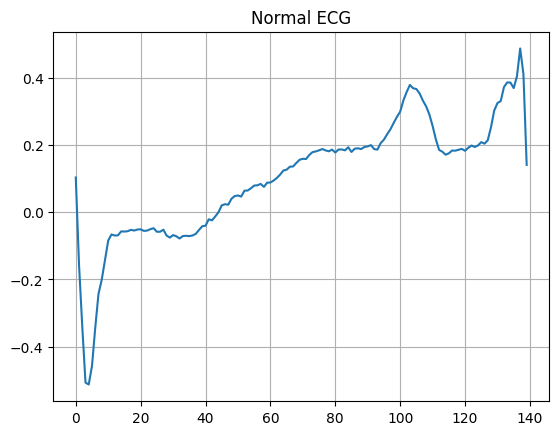

In [ ]:
#Lets plot a normal ECG
normal_ecg = normal_train_data[0]
plt.plot(np.arange(140), normal_ecg)
plt.grid()
plt.title('Normal ECG')
plt.show()

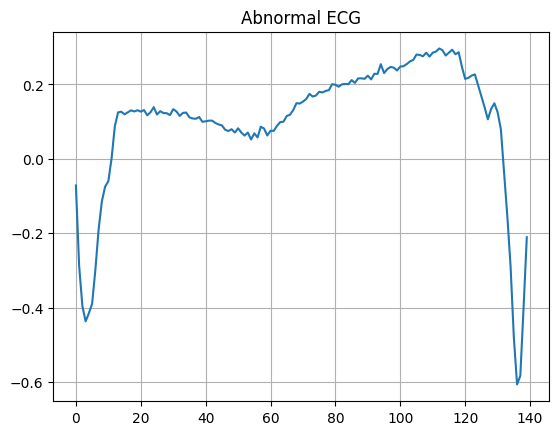

In [ ]:
#Lets plot one from abnormal ECG
abnormal_ecg = abnormal_train_data[0]
plt.plot(np.arange(140),abnormal_ecg )
plt.grid()
plt.title('Abnormal ECG')
plt.show()

# **model**

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, regularizers
# from torch_two_sample.statistics_diff import MMDStatistic
import torch

import matplotlib.pyplot as plt
import numpy as np
import random

from IPython import display
from tqdm import tqdm
from shutil import copyfile


In [ ]:
!ls

Generator.h5  sample_data


In [ ]:
import glob
model_files = glob.glob('*.h5')
print(model_files)

['Generator.h5']


In [ ]:
# the generator 

import tensorflow as tf
from tensorflow.keras import layers

# def make_generator_model():
#     model = tf.keras.Sequential()
#     model.add(layers.Dense(100 * 140, activation="relu", input_dim=140))
#     model.add(layers.Reshape((140, 100)))
#     model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
#     model.add(layers.Conv1DTranspose(filters=128, kernel_size=16, strides=1, padding="same"))
#     model.add(layers.LeakyReLU())
#     model.add(layers.Conv1DTranspose(filters=64, kernel_size=16, strides=1, padding="same"))
#     model.add(layers.LeakyReLU())
#     model.add(layers.Conv1DTranspose(filters=32, kernel_size=16, strides=1, padding="same"))
#     model.add(layers.LeakyReLU())
#     model.add(layers.Conv1DTranspose(filters=1, kernel_size=16, strides=1, padding="same", activation="tanh"))
#     return model
def make_generator_model():
    model = tf.keras.Sequential()
    
    # Dense layer with more neurons
    model.add(layers.Dense(100*140, activation="relu", input_dim=140))
    
    # Reshape layer
    model.add(layers.Reshape((140, 100)))
    
    # LSTM layers
    model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
    model.add(layers.BatchNormalization())
    model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.2, input_shape=(140,)))
    
    # Conv1DTranspose layers with skip connections
    model.add(layers.Conv1DTranspose(filters=1, kernel_size=16, strides=1, padding="same", activation="relu"))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv1DTranspose(filters=1, kernel_size=16, strides=1, padding="same", activation="relu"))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Conv1DTranspose(filters=1, kernel_size=16, strides=1, padding="same", activation="tanh"))
    
    return model



# def make_discriminator_model():
#     model = tf.keras.Sequential()
#     model.add(layers.Conv1D(filters=32, kernel_size=16, strides=1, padding="same", input_shape=(140, 1)))
#     model.add(layers.LeakyReLU())
#     model.add(layers.Conv1D(filters=64, kernel_size=16, strides=1, padding="same"))
#     model.add(layers.LeakyReLU())
#     model.add(layers.MaxPooling1D(pool_size=2))
#     model.add(layers.Conv1D(filters=128, kernel_size=16, strides=1, padding="same"))
#     model.add(layers.LeakyReLU())
#     model.add(layers.Conv1D(filters=256, kernel_size=16, strides=1, padding="same"))
#     model.add(layers.LeakyReLU())
#     model.add(layers.MaxPooling1D(pool_size=2))
#     model.add(layers.Flatten())
#     model.add(layers.Dense(1))
#     return model
import tensorflow as tf
from tensorflow.keras import layers

def make_discriminator_model():
    model = tf.keras.Sequential()
    
    # Conv1D layers
    model.add(layers.Conv1D(filters=32, kernel_size=16, strides=1, padding="same", input_shape=(140, 1)))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv1D(filters=64, kernel_size=16, strides=1, padding="same"))
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv1D(filters=128, kernel_size=16, strides=1, padding="same"))
    model.add(layers.LeakyReLU())
    model.add(layers.Conv1D(filters=256, kernel_size=16, strides=1, padding="same"))
    model.add(layers.LeakyReLU())
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.Dropout(0.3))
    
    # Flatten and dense layer
    model.add(layers.Flatten())
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU())
    
    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

generator = make_generator_model()
discriminator = make_discriminator_model()

generator.summary()
discriminator.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14000)             1974000   
                                                                 
 reshape (Reshape)           (None, 140, 100)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 140, 128)         84480     
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 140, 128)         512       
 ormalization)                                                   
                                                                 
 bidirectional_1 (Bidirectio  (None, 140, 128)         98816     
 nal)                                                            
                                                        

In [ ]:
def generate_noise(batch_size, noise_dim):
    """
    Generates random noise of shape (batch_size, noise_dim) between -1 and 1.
    """
    return tf.random.uniform([batch_size, noise_dim], minval=-1, maxval=1)


def generate_fake_signals(generator, noise):
    """
    Generates synthetic ECG signals from random noise using the generator model.
    """
    return generator(noise)

In [ ]:
# Define the loss function for the generator
def generator_loss(fake_output):
    return tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(fake_output), fake_output)

# Define the loss function for the discriminator
def discriminator_loss(real_output, fake_output):
    real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(real_output), real_output)
    fake_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss


In [ ]:
def train_gan(generator, discriminator, noise_dim, train_dataset, epochs, batch_size, generator_optimizer, discriminator_optimizer):
    for epoch in range(epochs):
        for batch in train_dataset:
            # Train discriminator
            with tf.GradientTape() as disc_tape:
                real_signals = batch
                noise = tf.random.normal([batch_size, noise_dim])
                generated_signals = generator(noise)
                real_output = discriminator(real_signals)
                generated_output = discriminator(generated_signals)
                disc_loss = discriminator_loss(real_output, generated_output)

            gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
            discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

            # Train generator
            with tf.GradientTape() as gen_tape:
                noise = tf.random.normal([batch_size, noise_dim])
                generated_signals = generator(noise)
                generated_output = discriminator(generated_signals)
                gen_loss = generator_loss(generated_output)

            gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

        print("Epoch:", epoch + 1, "Generator Loss:", gen_loss.numpy(), "Discriminator Loss:", disc_loss.numpy())


In [ ]:
# Define the optimizers
# generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.5)
# discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.5)

generator_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
discriminator_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

# Set the noise dimension
noise_dim = 140
seq_length = 140
# Define the number of epochs and batch size
EPOCHS = 5
BATCH_SIZE = 170
# Prepare the data
dim = (noise_dim,)


In [ ]:
def prepare_data(dim , train_dataset , test_dataset):
    # Batch and shuffle the data
    train_size = train_dataset.shape[0]
    test_size  = test_dataset.shape[0]
    train_dataset = tf.data.Dataset.from_tensor_slices(train_dataset).shuffle(train_size).batch(BATCH_SIZE)
    test_dataset  = tf.data.Dataset.from_tensor_slices(test_dataset).shuffle(test_size).batch(1)

    seed = tf.random.uniform(dim, minval=-1, maxval=1, dtype=tf.float32)

    # Reshape signals to match the discriminator input shape
    return seed ,train_dataset , test_dataset


In [ ]:
seed , train_dataset , test_dataset = prepare_data(dim,normal_train_data_df , normal_test_data_df)

In [ ]:
train_dataset

<_BatchDataset element_spec=TensorSpec(shape=(None, 140), dtype=tf.float64, name=None)>

In [ ]:
train_gan(generator, discriminator, noise_dim, train_dataset, EPOCHS, BATCH_SIZE, generator_optimizer, discriminator_optimizer)


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch: 1 Generator Loss: 0.7247102 Discriminator Loss: 1.0983199
Epoch: 2 Generator Loss: 1.2467817 Discriminator Loss: 0.4550516
Epoch: 3 Generator Loss: 1.2050993 Discriminator Loss: 1.0982915
Epoch: 4 Generator Loss: 0.7122995 Discriminator Loss: 1.4161752
Epoch: 5 Generator Loss: 0.88767684 Discriminator Loss: 1.4116341


In [ ]:
generator.save('Generator.h5')
model = tf.keras.models.load_model('Generator.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14000)             1974000   
                                                                 
 reshape (Reshape)           (None, 140, 100)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 140, 128)         84480     
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 140, 128)         512       
 ormalization)                                                   
                                                                 
 bidirectional_1 (Bidirectio  (None, 140, 128)         98816     
 nal)                                                            
                                                        

In [ ]:
noise = np.random.normal(0, 1, (10, noise_dim))
normalized_noise = 2 * noise - 1
synthetic_data = model.predict(normalized_noise)

# Print the shape of the generated data
print(synthetic_data.shape)

1/1 [==============================] - 1s 1s/step
(10, 140, 1)


In [ ]:
# seed = tf.random.uniform(dim, minval=-1, maxval=1, dtype=tf.float32)
noise = np.random.normal(0, 1, (10, noise_dim))
normalized_noise = 2 * noise - 1
ecg = generator(normalized_noise, training=False)
# answer = discriminator(ecg)


In [ ]:
seed = tf.random.normal([1, 140, 1])
normalized_seed = 2 * seed - 1

ecg = model(normalized_seed, training=False)
generated_normal_ecg = ecg.numpy().reshape(140, 1)


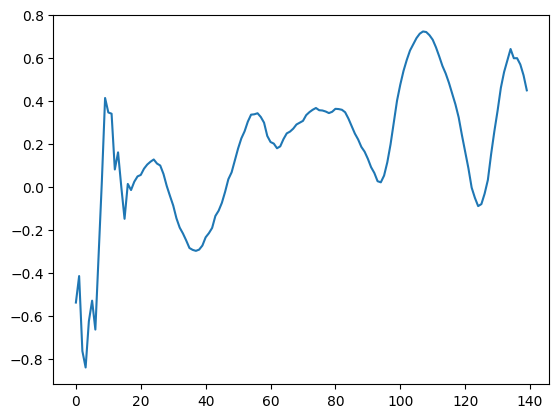

In [ ]:
plt.plot(generated_normal_ecg)


# **Testing**

In [ ]:
def rmse(targets, predictions):
    targets = targets.numpy()
    predictions = predictions.numpy()
    return np.sqrt(np.mean((targets-predictions)**2))


def prd(targets, predictions):
    targets = targets.numpy()
    predictions = predictions.numpy()
    s1 = np.sum((targets-predictions)**2)
    s2 = np.sum(targets**2)
    return np.sqrt(s1 / s2 * 100)


# def mmd(targets, predictions):
#     mmd_stat = MMDStatistic(400, 400)
#     sample_target = torch.from_numpy(targets.numpy().reshape((400,1)))
#     sample_pred = torch.from_numpy(predictions.numpy().reshape((400,1)))
    
#     stat = mmd_stat(sample_target, sample_pred, [1.])
#     return(stat.item())


def testing(test_dataset, model, noise_dim):
    # print(train_dataset.element_spec.shape)
    # print(noise_dim)
    noise = tf.random.normal(noise_dim , dtype=tf.double)
    generated_ecgs = model(noise, training=False)
    # print(generated_ecgs.shape)
    mmd_sum, prd_sum, rmse_sum = [], [], []
    for true_ecg, gen_ecg in zip(test_dataset, generated_ecgs):
        prd_sum.append(prd(true_ecg[0], gen_ecg))
        rmse_sum.append(rmse(true_ecg[0], gen_ecg))
        # mmd_sum.append(mmd(true_ecg[0][0], gen_ecg[0]))

    # print('mmd :', f'mean={np.mean(mmd_sum):.6f}', f'min={np.min(mmd_sum):.6f}', f'max={np.max(mmd_sum):.6f}')
    print('prd :', f'mean={np.mean(prd_sum):.4f}', f'min={np.min(prd_sum):.4f}', f'max={np.max(prd_sum):.4f}')
    print('rmse:', f'mean={np.mean(rmse_sum):.4f}', f'min={np.min(rmse_sum):.4f}', f'max={np.max(rmse_sum):.4f}')

In [ ]:
testing(test_dataset, model, [200,140])

prd : mean=185.5694 min=178.6917 max=193.1246
rmse: mean=0.3246 min=0.3126 max=0.3378


# **Abnormal Data**

In [ ]:
seed_abnormal , train_dataset_abnormal , test_dataset_abnormal = prepare_data(dim,abnormal_train_data_df , abnormal_test_data_df)

In [ ]:
train_gan(generator, discriminator, noise_dim, train_dataset_abnormal, EPOCHS, BATCH_SIZE, generator_optimizer, discriminator_optimizer)


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Epoch: 1 Generator Loss: 1.4734695 Discriminator Loss: 0.7959576
Epoch: 2 Generator Loss: 1.5286937 Discriminator Loss: 0.86463404
Epoch: 3 Generator Loss: 1.4610789 Discriminator Loss: 1.0275018
Epoch: 4 Generator Loss: 1.4897921 Discriminator Loss: 0.84828424
Epoch: 5 Generator Loss: 1.7996035 Discriminator Loss: 0.99107105


In [ ]:
generator.save('generator_abnormal.h5')
model_abnormal = tf.keras.models.load_model('generator_abnormal.h5')
model_abnormal.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14000)             1974000   
                                                                 
 reshape (Reshape)           (None, 140, 100)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 140, 128)         84480     
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 140, 128)         512       
 ormalization)                                                   
                                                                 
 bidirectional_1 (Bidirectio  (None, 140, 128)         98816     
 nal)                                                            
                                                        

In [ ]:
pip install deepdish

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import deepdish as dd

# Load the HDF5 file into a dictionary
data_dict = dd.io.load('generator_abnormal.h5')

# Pickle the dictionary to a file
dd.io.save('generator_abnormal.pkl', data_dict)


/usr/local/lib/python3.10/dist-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'beta:0'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/usr/local/lib/python3.10/dist-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'gamma:0'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/usr/local/lib/python3.10/dist-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'moving_mean:0'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribut

In [ ]:
from google.colab import files

# Download the pickle file
files.download('generator_abnormal.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

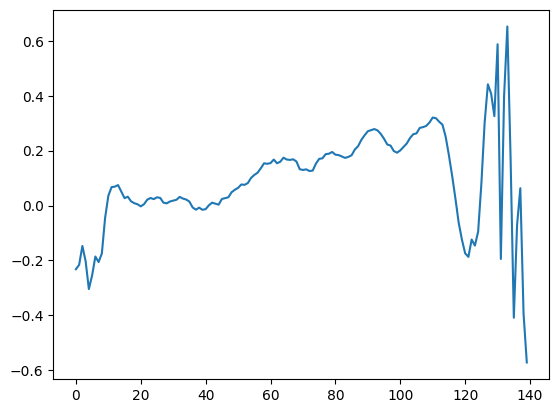

In [ ]:
seed = tf.random.normal([1, 140, 1])
normalized_seed = 2 * seed - 1

ecg = model_abnormal(normalized_seed, training=False)
generated_ecg_abnormal = ecg.numpy().reshape(140, 1)
plt.plot(generated_ecg_abnormal)


In [ ]:
testing(test_dataset_abnormal, model, [1000,140])

prd : mean=185.2717 min=177.0953 max=196.4015
rmse: mean=0.3241 min=0.3098 max=0.3436


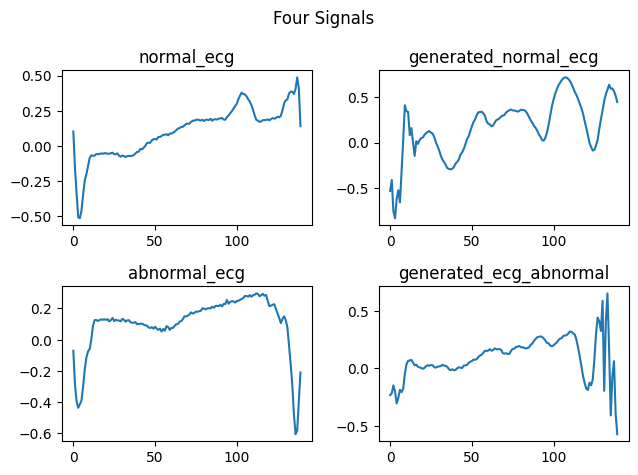

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# create subplots with appropriate spacing
fig, axs = plt.subplots(nrows=2, ncols=2, tight_layout=True)

# plot each signal in a different subplot
axs[0, 0].plot(normal_ecg)
axs[0, 0].set_title('normal_ecg')

axs[0, 1].plot(generated_normal_ecg)
axs[0, 1].set_title('generated_normal_ecg')

axs[1, 0].plot(abnormal_ecg)
axs[1, 0].set_title('abnormal_ecg')

axs[1, 1].plot(generated_ecg_abnormal)
axs[1, 1].set_title('generated_ecg_abnormal')

# add a title for the entire figure
fig.suptitle('Four Signals')

# display the figure
plt.show()